In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
x = tfd.Normal(loc=0,scale=1).sample(10).numpy()
print(np.std(x,ddof=1)/10**0.5)
print(sps.sem(x))

0.39512306155300597
0.39512306155300597


## ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $(\overline{X} - \frac{Z_{\frac{1+\alpha}{2}}}{\sqrt{n}}s,\overline{X}+ \frac{Z_{\frac{1+\alpha}{2}}}{\sqrt{n}}s)$ 

Точный доверительный интервал: $(\overline{X} - \frac{T_{(n-1,\frac{1+\alpha}{2})}}{\sqrt{n}}s,\overline{X}+ \frac{T_{(n-1,\frac{1+\alpha}{2})}}{\sqrt{n}}s)$

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [49]:
import tensorflow_probability as tfp
import scipy.stats as sps
tfd = tfp.distributions 

def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    mean = np.mean(sample)
    std_mean = sps.sem(sample)
    quantile = tfd.Normal(loc=0,scale=1).quantile((1+alpha)/2).numpy()    
    # ваш код
    return (mean - std_mean * quantile, mean + std_mean * quantile)

def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    mean = np.mean(sample)
    std_mean = sps.sem(sample)
    degrees_of_freedom = len(sample) -1 
    quantile = tfd.StudentT(degrees_of_freedom, loc=0,scale=1).quantile((1+alpha)/2).numpy()    
    # ваш код
    return (mean - std_mean * quantile, mean + std_mean * quantile)

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.

In [64]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка',
    interval_label = 'Доверительные интервалы',
      ax = None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    :param interval_label: подпись для доверительных интервалов
    :param ax: график для визуализации
    '''
    
    time = np.arange(len(left)) + 1
    
    assert len(time) == len(right)

    estimation_flg = estimation is not None and sample is not None
    if estimation_flg :
        estimates = np.empty(len(time))
        for i in range(len(time)):
            estimates[i] = estimation(sample[:i+1])

    if ax is not None:
        if estimation_flg:
            ax.plot(time,estimates,color=color_estimation,label= label_estimation)
        ax.fill_between(time,left,right, color = color_interval, alpha=0.2,label = interval_label)
    else: 
    # ваш код
        if estimation_flg:
            plt.plot(time,estimates,color=color_estimation,label= label_estimation)
        plt.fill_between(time,left,right, color = color_interval,alpha=0.2, label = interval_label)
        plt.legend(fontsize=16)
        plt.ylim(ylim) 
        plt.xlabel('Размер выборки')
        plt.title('Зависимость доверительного интервала от размера выборки')
        plt.grid()

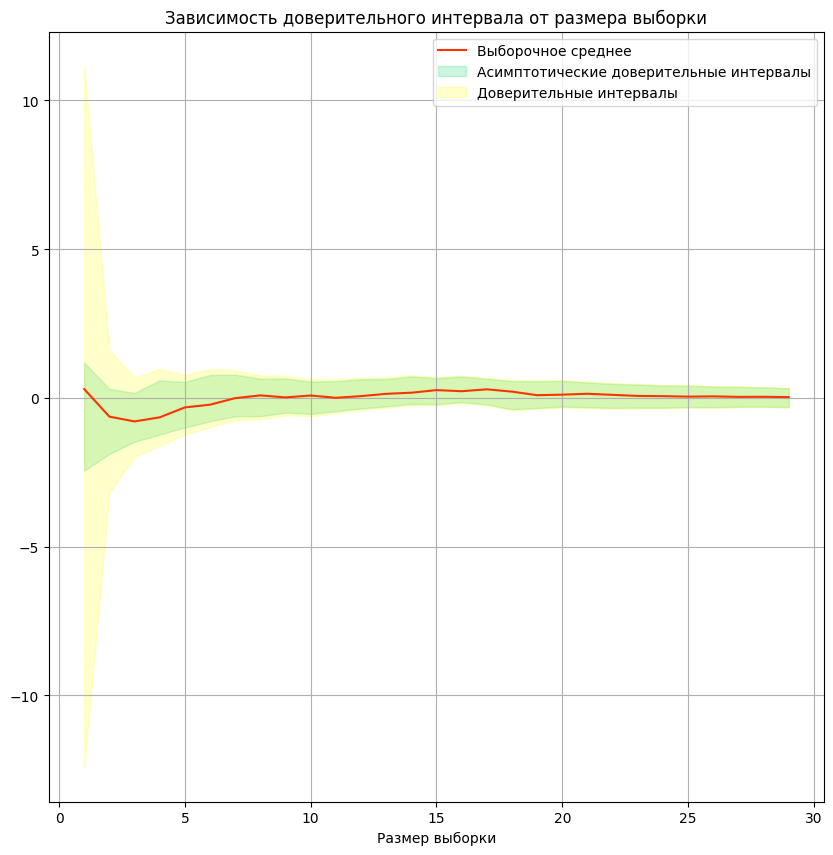

In [67]:
# ваш код
samples = tfd.Normal(loc=0,scale=1).sample(30).numpy()

aci,ci = [],[]

for i in range(1,len(samples)):
    aci.append(calculate_asymptotic_confidence_intervals(samples[:i+1]))
    ci.append(calculate_confidence_intervals(samples[:i+1]))

left_aci, right_aci = zip(*aci)
left_ci, right_ci = zip(*ci)

fig,ax = plt.subplots(1,1,figsize=(10,10))

draw_confidence_interval(
    left = left_aci,
    right = right_aci,
    ax = ax,
    estimation = np.mean,
    sample = samples,
    interval_label = 'Асимптотические доверительные интервалы',
    label_estimation = 'Выборочное среднее'
)

draw_confidence_interval(
    left = left_ci,
    right = right_ci,
    ax = ax,
    color_interval='yellow',
    interval_label = 'Доверительные интервалы'
)

ax.legend()
ax.set(xlabel= 'Размер выборки', title = 'Зависимость доверительного интервала от размера выборки')
ax.grid()

In [69]:
(np.array(right_aci) - np.array(left_aci)) / (np.array(right_ci) - np.array(left_ci))

array([0.15425241, 0.45552434, 0.61586701, 0.7059256 , 0.76245921,
       0.8009948 , 0.82886902, 0.84993953, 0.8664136 , 0.87964182,
       0.89049394, 0.89955585, 0.90723587, 0.91382713, 0.91954502,
       0.92455252, 0.92897406, 0.93290663, 0.93642688, 0.93959648,
       0.94246529, 0.94507433, 0.94745679, 0.94964149, 0.95165196,
       0.95350812, 0.95522712, 0.95682346, 0.95831006])

**Вывод:** нормальное распределение недооценивает неопределенность, которую вносит оценка дисперсии. Недооценка снижается с числом сэмплов. При размере выборки порядка 30 имеем различие в 5 процентов. В задачах где эпистемическая случайность превосходит алеаторную это погрешность вполне допустима :smile:   